In [7]:
""" Luis Felipe Castaño Villada

Dataset utilizado para la regresión Lineal: Titanic
Set de datos sobre los pasajeros del Titanic. Permite practicar
modelos de clasificación y regresión para predecir quién sobrevivió
al naufragio."""

' Luis Felipe Castaño Villada\n\nDataset utilizado para la regresión Lineal: Titanic\nSet de datos sobre los pasajeros del Titanic. Permite practicar\nmodelos de clasificación y regresión para predecir quién sobrevivió\nal naufragio.'

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Se ingresa la ruta del archivo
data = pd.read_csv("./Titanic-Dataset.csv")


# Verificar las dimensiones del Dataset resultante
print("Dimensiones del Dataset unido:", data.shape)


Dimensiones del Dataset unido: (891, 12)


In [16]:
# Paso 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

# Mostrar una muestra aleatoria de filas del Dataset
sample_data = data.sample(min(100, len(data)))  # Muestra aleatoria de hasta 100 filas
sample_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
511,512,0,3,"Webber, Mr. James",male,NaN,0,0,SOTON/OQ 3101316,8.0500,NaN,S
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
342,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S
522,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C
238,239,0,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.5000,NaN,S


In [17]:
data.describe()  # Muestra estadísticas descriptivas

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
data.head()    # Muestra las primeras 5 filas del Dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# Paso 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

# En el analisis explorarotio se identifico muchos valores Nan, el objetivo es iniciar eliminandolos

# Eliminar las filas que contengan NaN
data = data.dropna(axis=0)

In [24]:
# Verificar las dimensiones del Dataset resultante
print("Cambios en el Dataset sin los NaN:", data.shape)


Cambios en el Dataset sin los NaN: (183, 12)


In [25]:
# Filtra las columnas numéricas
numeric_data = data.select_dtypes(include=[np.number]) 

# Identifica las columnas que contienen al menos un cero
columns_with_zeros = numeric_data.columns[(numeric_data == 0).any()].tolist()

# Solo las columnas Survived, SibSp, Parch, Fare tiene valores en cero. En la unica columna que no deberia tener valores en 0 es Fare
print("Columnas numéricas con al menos un cero:", columns_with_zeros)

Columnas numéricas con al menos un cero: ['Survived', 'SibSp', 'Parch', 'Fare']


In [26]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [27]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


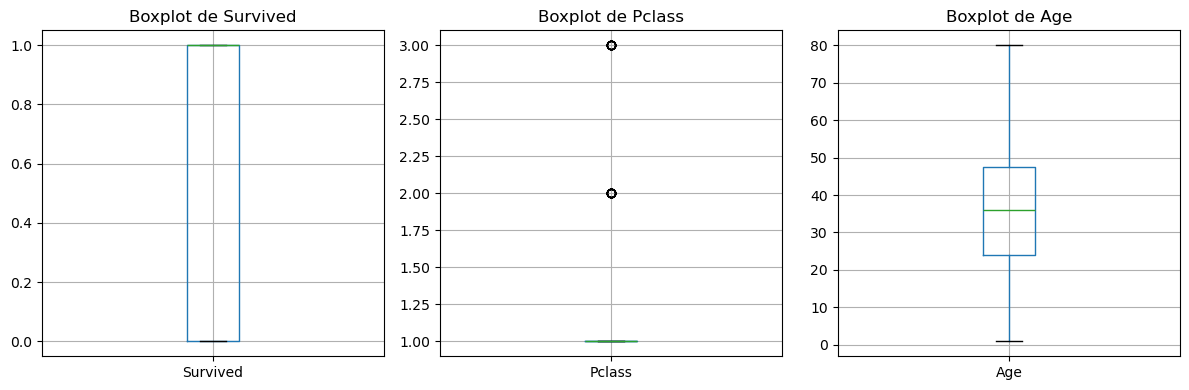

In [28]:
# Identificando datos atipicos 

# Nombres de las columnas para los gráficos de caja
columns = ['Survived', 'Pclass', 'Age']
titles = ['Boxplot de Survived', 'Boxplot de Pclass', 'Boxplot de Age']

plt.figure(figsize=(12, 4))

# Crear un gráfico de caja para cada columna
for i, (column, title) in enumerate(zip(columns, titles), start=1):
    plt.subplot(1, 3, i)
    data.boxplot(column=column)
    plt.title(title)

plt.tight_layout()
plt.show()


In [31]:
# luego de la visualización se crean los rangos que definen que es atipico o no. 

variables = {
    'Survived': (0, 1),       
    'Pclass': (0, 3),   
    'Age': (1, 80) 
}

# Calcular los datos atípicos

for variable, (min_level, max_level) in variables.items():
    atypical = data[(data[variable] < min_level) | (data[variable] > max_level)]
    total_atypical = atypical.shape[0]
    percentage = (total_atypical / data.shape[0]) * 100  # Cálculo del porcentaje de datos atípicos
    print(f"Datos atípicos en {variable}: {total_atypical}, {percentage:.2f}% del total")


Datos atípicos en Survived: 0, 0.00% del total
Datos atípicos en Pclass: 0, 0.00% del total
Datos atípicos en Age: 1, 0.55% del total


In [32]:
# Borrar los datos atipicos del dataset

for variable, (nivel_minimo, nivel_maximo) in variables.items():
    data = data[(data[variable] <= nivel_maximo) & (data[variable] >= nivel_minimo)]

In [33]:
# Calcular los datos atípicos nuevamente, para verificar que fueron eliminados

for variable, (min_level, max_level) in variables.items():
    atypical = data[(data[variable] < min_level) | (data[variable] > max_level)]
    total_atypical = atypical.shape[0]
    percentage = (total_atypical / data.shape[0]) * 100  # Cálculo del porcentaje de datos atípicos
    print(f"Datos atípicos en {variable}: {total_atypical}, {percentage:.2f}% del total")

Datos atípicos en Survived: 0, 0.00% del total
Datos atípicos en Pclass: 0, 0.00% del total
Datos atípicos en Age: 0, 0.00% del total


In [34]:
# De esta forma queda el dataset sin valores atipicos

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  182 non-null    int64  
 1   Survived     182 non-null    int64  
 2   Pclass       182 non-null    int64  
 3   Name         182 non-null    object 
 4   Sex          182 non-null    object 
 5   Age          182 non-null    float64
 6   SibSp        182 non-null    int64  
 7   Parch        182 non-null    int64  
 8   Ticket       182 non-null    object 
 9   Fare         182 non-null    float64
 10  Cabin        182 non-null    object 
 11  Embarked     182 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.5+ KB


In [35]:
# Punto 3. Seleccionar las características más relevantes para entrenar el  modelo utilizando selección de características

# Variable dependiente y necesaria para las predicciones. 
data['Survived'].value_counts()
data['Survived'].head(30)

1      1
3      1
6      0
10     1
11     1
21     1
23     1
27     0
52     1
54     0
62     0
66     1
75     0
88     1
92     0
96     0
97     1
102    0
110    0
118    0
123    1
124    0
136    1
137    0
139    0
148    0
151    1
170    0
174    0
177    0
Name: Survived, dtype: int64

In [36]:
#  Paso 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

# se realiza Train 80%, Y Test 20%

features = ['Pclass', 'Age']  # Variables independientes
target = 'Survived'           # Variable dependiente

# Preparar los datos de entrada (X) y salida (Y)
X = data[features]  # Datos de entrada solo con las características seleccionadas
Y = data[target]    # Datos de salida (precio de venta)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Mostrar las dimensiones de los conjuntos para verificar su correcta división
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de Y_train:", Y_train.shape)
print("Tamaño de Y_test:", Y_test.shape)

Tamaño de X_train: (145, 2)
Tamaño de X_test: (37, 2)
Tamaño de Y_train: (145,)
Tamaño de Y_test: (37,)


In [37]:
# Paso 5. Entrenar el modelo configurando los diferentes hiperparámetros.

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, Y_train)  # Entrenamiento del modelo

# Realizar predicciones con el modelo entrenado sobre el conjunto de prueba
prediccion = modelo.predict(X_test)


In [38]:
print(Y_test)

484    1
110    0
195    1
496    1
889    1
806    0
27     0
689    1
325    1
369    1
21     1
556    1
871    1
641    1
782    0
724    1
583    0
523    1
412    1
745    0
345    1
307    1
218    1
710    1
11     1
336    0
456    0
879    1
262    0
453    1
544    0
329    1
151    1
319    1
820    1
763    1
52     1
Name: Survived, dtype: int64


In [39]:
print(prediccion)

[0.77984725 0.57378177 0.47074904 0.50821549 0.77048063 0.64871467
 0.83604692 0.87351337 0.67681451 0.78921386 0.57249576 0.56441516
 0.57378177 0.78921386 0.7423808  0.76111402 0.67681451 0.60188161
 0.70491435 0.35834969 0.66616189 0.85478014 0.71428096 0.78921386
 0.47074904 0.7423808  0.40518275 0.48948226 0.52694871 0.55504855
 0.54568194 0.86414676 0.80794708 0.63934806 0.52694871 0.67681451
 0.55504855]


In [40]:
# Paso 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

r2 = r2_score(Y_test, prediccion)
mse = mean_squared_error(Y_test, prediccion)
mae = mean_absolute_error(Y_test, prediccion)
rmse = mean_squared_error(Y_test, prediccion, squared=False)

print(f"Coeficiente de determinación R^2: {r2:.2f}")
print(f"Error cuadrático medio MSE: {mse:.2f}")
print(f"Error absoluto medio MAE: {mae:.2f}")
print(f"Raíz del error cuadrático medio RMSE: {rmse:.2f}")

Coeficiente de determinación R^2: 0.00
Error cuadrático medio MSE: 0.20
Error absoluto medio MAE: 0.41
Raíz del error cuadrático medio RMSE: 0.44


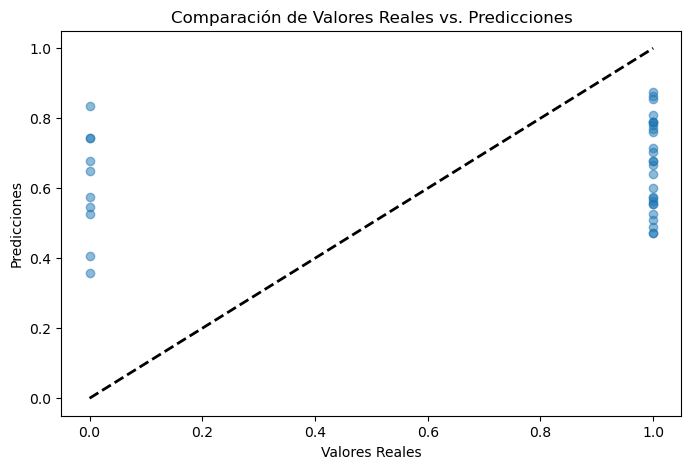

In [42]:
# Paso 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

# Gráfico de dispersión de los valores reales vs. los predichos

plt.figure(figsize=(8, 5))
plt.scatter(Y_test, prediccion, alpha=0.5)
plt.title('Comparación de Valores Reales vs. Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # Línea ideal
plt.show()

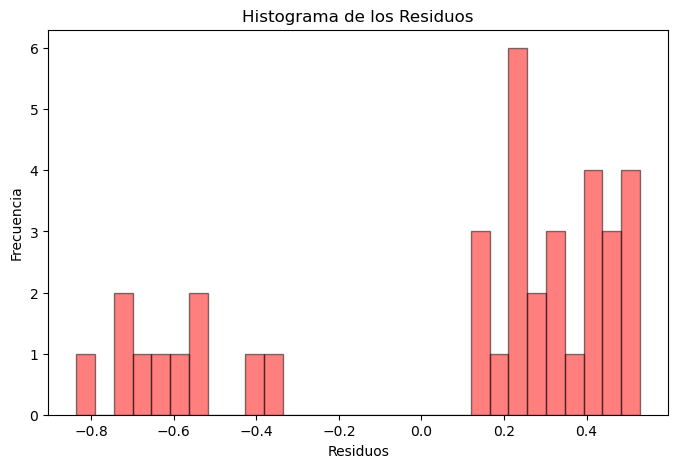

In [43]:
# Historigrama de los residuos

residuos = Y_test - prediccion

plt.figure(figsize=(8, 5))
plt.hist(residuos, bins=30, alpha=0.5, color='red', edgecolor='black')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()


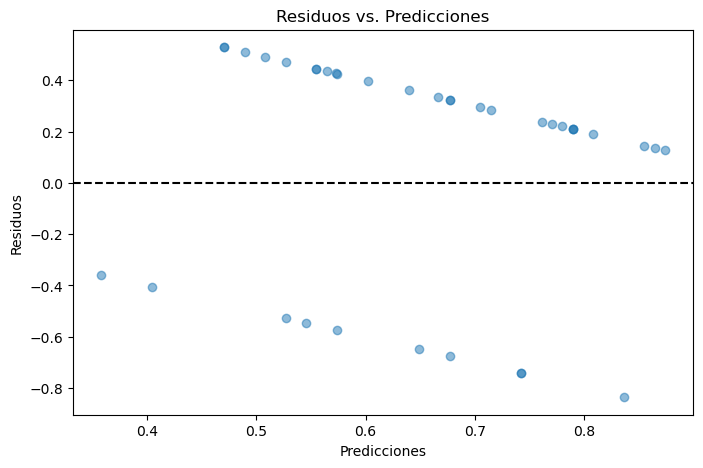

In [44]:
# Grafico de residuos VS predicciones

plt.figure(figsize=(8, 5))
plt.scatter(prediccion, residuos, alpha=0.5)
plt.title('Residuos vs. Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.axhline(y=0, color='k', linestyle='--')  # Línea en y=0
plt.show()


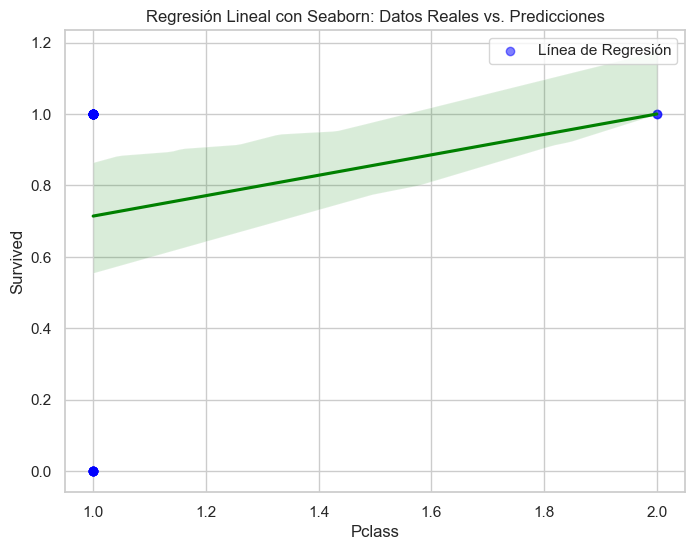

In [49]:
# Gráfico de regresión

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.regplot(x=X_test['Pclass'], y=Y_test, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'green'}, label='Línea de Regresión')

plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.title('Regresión Lineal con Seaborn: Datos Reales vs. Predicciones')
plt.legend()
plt.show()


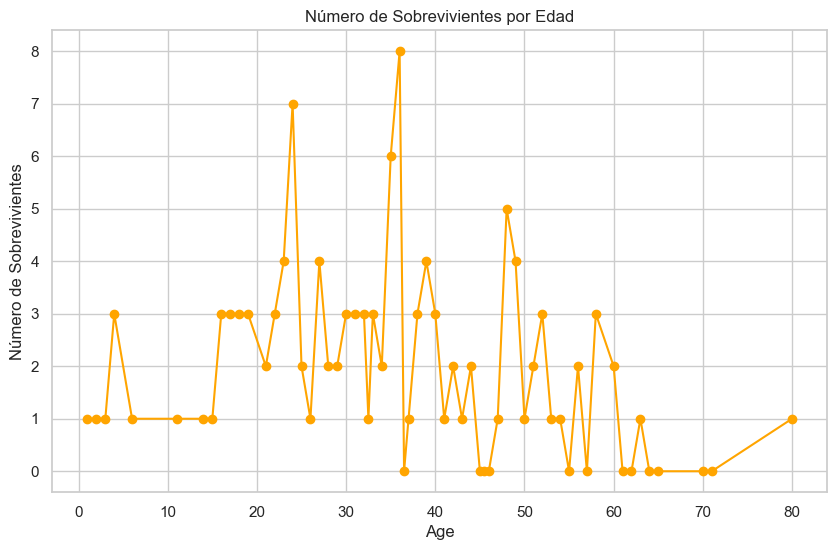

In [58]:
# Contar el número de sobrevivientes en cada edad
sobrevivientes_por_edad = data.groupby('Age')['Survived'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(sobrevivientes_por_edad['Age'], sobrevivientes_por_edad['Survived'], marker='o', linestyle='-', color= 'orange')
plt.title('Número de Sobrevivientes por Edad')
plt.xlabel('Age')
plt.ylabel('Número de Sobrevivientes')
plt.grid(True)
plt.show()

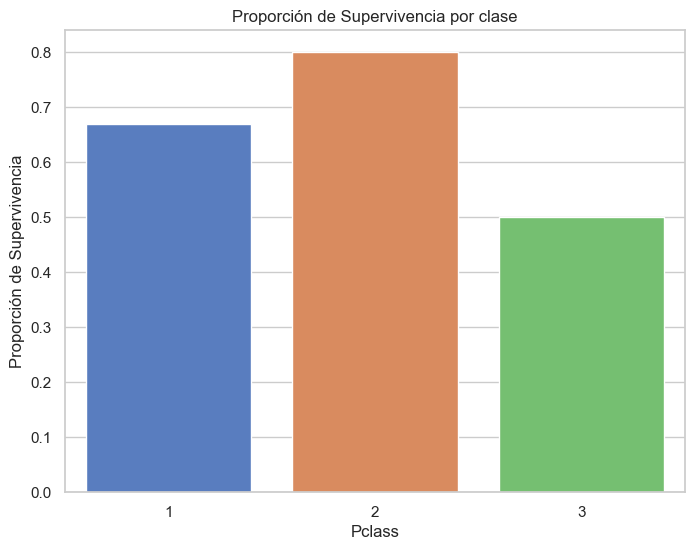

In [61]:
# Calcular las proporciones de supervivencia para cada clase
proporcion_supervivencia = data.groupby('Pclass')['Survived'].mean()

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.barplot(x=proporcion_supervivencia.index, y=proporcion_supervivencia.values, palette='muted')

plt.xlabel('Pclass')
plt.ylabel('Proporción de Supervivencia')
plt.title('Proporción de Supervivencia por clase')
plt.show()
